# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

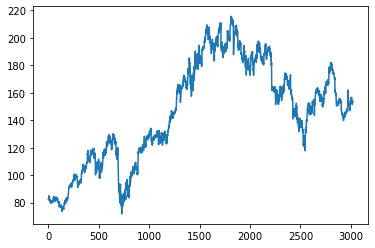

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("IBM_2006-01-01_to_2018-01-01.csv")
plt.plot(df['Close'])
plt.show()


In [23]:
import tensorflow as tf
import numpy as np


def slidingWindow(arr,window):
  traindata = np.zeros((len(arr),window))
  for i in range(0,len(arr)-window-1):
    for j in range(0,window):
      traindata[i][j] = arr[i+j]
  traindata = traindata[~np.all(traindata == 0, axis=1)]
  return traindata


closePrice = np.array(df['Close'])
closePrice
dataset = slidingWindow(closePrice,7)
features = dataset[:,:6]
label = dataset[:,6:7]
print(features.shape)
print(label.shape)
#print(features)

(3012, 6)
(3012, 1)


In [24]:
from sklearn import preprocessing

normalized_features = preprocessing.normalize(features,axis=0)
normalized_label = preprocessing.normalize(label,axis=0)
#print(normalized_features)


# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [25]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_features, normalized_label, test_size=0.2)

#print(x_train[0].shape)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss="mean_squared_error", metrics=['mse'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                448       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs= 100)

Epoch 1/100
76/76 [==============================] - 0s 1ms/step - loss: 8.4412e-04 - mse: 8.4412e-04
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 7.5085e-06 - mse: 7.5085e-06
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2749e-06 - mse: 2.2749e-06
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 3.7685e-07 - mse: 3.7685e-07
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 2.2822e-07 - mse: 2.2822e-07
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 1.8980e-07 - mse: 1.8980e-07
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 2.5319e-07 - mse: 2.5319e-07
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 2.6210e-07 - mse: 2.6210e-07
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 5.2803e-07 - mse: 5.2803e-07
Epoch 10/100
76/76 [==============================] - 0s 1ms/step - loss: 5.1237e-

Text(0, 0.5, 'MSE')

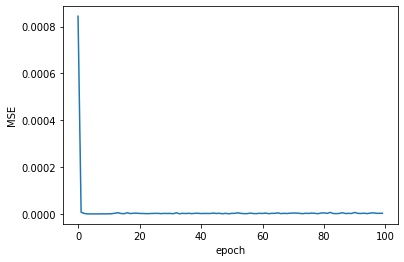

In [27]:
plt.plot(hist.history["mse"])
plt.xlabel("epoch")
plt.ylabel("MSE")

In [28]:
y_pred = model.predict(x_test)[0,0]
print("Actual Value ",y_test[1])
print("Predicted Value ",y_pred)

19/19 [==============================] - 0s 1ms/step
Actual Value  [0.02494199]
Predicted Value  0.016074046


## Subtask 3

Perform prediction by using RNN

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

modelRNN = Sequential()
modelRNN.add(SimpleRNN(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
modelRNN.add(Dropout(0.2))
modelRNN.add(SimpleRNN(units = 50,return_sequences = True))
modelRNN.add(Dropout(0.2))
modelRNN.add(Dense(units = 1,activation="linear"))

modelRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["mse"])

modelRNN.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 6, 50)             2600      
                                                                 
 dropout_4 (Dropout)         (None, 6, 50)             0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 6, 50)             5050      
                                                                 
 dropout_5 (Dropout)         (None, 6, 50)             0         
                                                                 
 dense_8 (Dense)             (None, 6, 1)              51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


In [30]:
historyRNN = modelRNN.fit(x_train, y_train,validation_split=0.1, epochs = 100, batch_size = 12)

Epoch 1/100
181/181 [==============================] - 2s 5ms/step - loss: 2.2537e-05 - mse: 2.2537e-05 - val_loss: 9.6586e-07 - val_mse: 9.6586e-07
Epoch 2/100
181/181 [==============================] - 1s 4ms/step - loss: 3.0180e-06 - mse: 3.0180e-06 - val_loss: 5.1852e-07 - val_mse: 5.1852e-07
Epoch 3/100
181/181 [==============================] - 1s 4ms/step - loss: 1.9576e-06 - mse: 1.9576e-06 - val_loss: 3.0067e-07 - val_mse: 3.0067e-07
Epoch 4/100
181/181 [==============================] - 1s 4ms/step - loss: 1.4843e-06 - mse: 1.4843e-06 - val_loss: 3.6128e-07 - val_mse: 3.6128e-07
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 1.4234e-06 - mse: 1.4234e-06 - val_loss: 2.5435e-07 - val_mse: 2.5435e-07
Epoch 6/100
181/181 [==============================] - 1s 4ms/step - loss: 1.4988e-06 - mse: 1.4988e-06 - val_loss: 3.4927e-07 - val_mse: 3.4927e-07
Epoch 7/100
181/181 [==============================] - 1s 4ms/step - loss: 1.2569e-06 - mse: 1.2569e-06 - 

Text(0, 0.5, 'MSE')

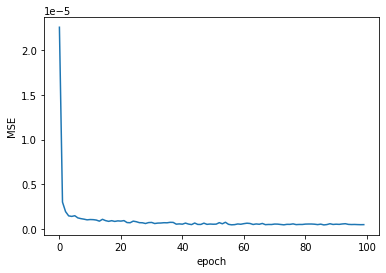

In [31]:
plt.plot(historyRNN.history["mse"])
plt.xlabel("epoch")
plt.ylabel("MSE")

In [32]:
y_pred = modelRNN.predict(x_test)[0,0]
print("Actual Value ",y_test[1])
print("Predicted Value ",y_pred)

19/19 [==============================] - 0s 2ms/step
Actual Value  [0.02494199]
Predicted Value  [0.01804382]


## Subtask 4

Perform prediction by using LSTM

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM

modelLSTM = Sequential()
modelLSTM.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units = 50,return_sequences = True))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(units = 1,activation="linear"))

modelLSTM.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["mse"])

modelLSTM.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 50)             10400     
                                                                 
 dropout_6 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_7 (Dropout)         (None, 6, 50)             0         
                                                                 
 dense_9 (Dense)             (None, 6, 1)              51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [34]:
historyLSTM = modelLSTM.fit(x_train, y_train, epochs = 50, batch_size = 12)

Epoch 1/50
201/201 [==============================] - 4s 6ms/step - loss: 2.4222e-05 - mse: 2.4222e-05
Epoch 2/50
201/201 [==============================] - 1s 6ms/step - loss: 6.4621e-06 - mse: 6.4621e-06
Epoch 3/50
201/201 [==============================] - 1s 6ms/step - loss: 4.4973e-06 - mse: 4.4973e-06
Epoch 4/50
201/201 [==============================] - 1s 6ms/step - loss: 3.2794e-06 - mse: 3.2794e-06
Epoch 5/50
201/201 [==============================] - 1s 6ms/step - loss: 2.1603e-06 - mse: 2.1603e-06
Epoch 6/50
201/201 [==============================] - 1s 6ms/step - loss: 1.6632e-06 - mse: 1.6632e-06
Epoch 7/50
201/201 [==============================] - 1s 6ms/step - loss: 1.3305e-06 - mse: 1.3305e-06
Epoch 8/50
201/201 [==============================] - 1s 6ms/step - loss: 1.0083e-06 - mse: 1.0083e-06
Epoch 9/50
201/201 [==============================] - 1s 7ms/step - loss: 9.0239e-07 - mse: 9.0239e-07
Epoch 10/50
201/201 [==============================] - 1s 6ms/step - loss

Text(0, 0.5, 'MSE')

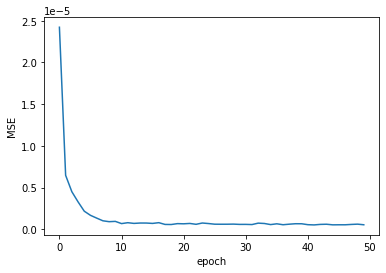

In [35]:
from matplotlib import pyplot as plt
plt.plot(historyLSTM.history["mse"])
plt.xlabel("epoch")
plt.ylabel("MSE")

In [36]:

y_pred = modelLSTM.predict(x_test)[0,0]
print("Actual Value ",y_test[1])
print("Predicted Value ",y_pred)

19/19 [==============================] - 1s 2ms/step
Actual Value  [0.02494199]
Predicted Value  [0.01785911]


## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

In [37]:
evalFNN = model.evaluate(x_test,y_test)
print("FNN MSE")
print(evalFNN)

19/19 [==============================] - 0s 1ms/step - loss: 2.5511e-06 - mse: 2.5511e-06
FNN MSE
[2.5511044441373087e-06, 2.5511044441373087e-06]


In [38]:
evalRNN = modelRNN.evaluate(x_test,y_test)
print("RNN MSE")
print(evalRNN)

19/19 [==============================] - 0s 2ms/step - loss: 1.8506e-07 - mse: 1.8506e-07
RNN MSE
[1.8505680543512426e-07, 1.8505680543512426e-07]


In [39]:
evalLSTM = modelLSTM.evaluate(x_test,y_test)
print("LSTM MSE")
print(evalLSTM)

19/19 [==============================] - 1s 2ms/step - loss: 1.8325e-07 - mse: 1.8325e-07
LSTM MSE
[1.8324719519569044e-07, 1.8324719519569044e-07]


The MSE of LSTM model is lowest therefore it is better model compared to RNN and FNN